# Colorectal Cancer Risk & Survival Prediction

## Objective
The goal of this project is to predict the **survival status** of colorectal cancer patients based on their demographics, medical history, and lifestyle factors.

## Dataset Overview
The dataset contains records of **colorectal cancer patients**, with features related to risk factors, treatment, and outcomes.

## Instructions
1. **Data Exploration**: Load and examine the dataset.
2. **Data Preprocessing**: Handle missing values, encode categorical variables, and normalize numerical features.
3. **Feature Selection**: Identify important predictors for survival.
4. **Model Training**: Train a classification model to predict survival status.
5. **Evaluation**: Assess model performance using accuracy and classification reports.

In [3]:

# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


In [4]:

# Load the dataset
df = pd.read_csv('colorectal_cancer_prediction.csv')

# Display basic information about the dataset
print("First 5 Rows of the Dataset:")
display(df.head())

print("\n Shape of the Dataset (rows, columns):")
print(df.shape)

print("\n Column Names:")
print(df.columns.tolist())

print("\n Data Types of Each Column:")
print(df.dtypes)

print("\n Summary of Dataset Info:")
print(df.info())

print("\n Summary Statistics for Numerical Columns:")
display(df.describe())

print("\n Missing Values in Each Column:")
print(df.isnull().sum())



First 5 Rows of the Dataset:


,Patient_ID,Age,Gender,Race,Region,Urban_or_Rural,Socioeconomic_Status,Family_History,Previous_Cancer_History,Stage_at_Diagnosis,...,Insurance_Coverage,Time_to_Diagnosis,Treatment_Access,Chemotherapy_Received,Radiotherapy_Received,Surgery_Received,Follow_Up_Adherence,Survival_Status,Recurrence,Time_to_Recurrence
0,1,71,Male,Other,Europe,Urban,Middle,Yes,No,III,...,Yes,Delayed,Good,Yes,No,No,Good,Survived,No,16
1,2,34,Female,Black,North America,Urban,Middle,No,No,I,...,No,Timely,Good,No,Yes,Yes,Poor,Deceased,No,28
2,3,80,Female,White,North America,Urban,Middle,No,No,III,...,Yes,Timely,Limited,No,Yes,Yes,Good,Survived,No,26
3,4,40,Male,Black,North America,Rural,Low,No,No,I,...,Yes,Delayed,Limited,Yes,No,Yes,Poor,Deceased,No,44
4,5,43,Female,White,Europe,Urban,High,Yes,No,III,...,No,Delayed,Good,Yes,No,Yes,Poor,Deceased,Yes,20



 Shape of the Dataset (rows, columns):
(89945, 30)

 Column Names:
['Patient_ID', 'Age', 'Gender', 'Race', 'Region', 'Urban_or_Rural', 'Socioeconomic_Status', 'Family_History', 'Previous_Cancer_History', 'Stage_at_Diagnosis', 'Tumor_Aggressiveness', 'Colonoscopy_Access', 'Screening_Regularity', 'Diet_Type', 'BMI', 'Physical_Activity_Level', 'Smoking_Status', 'Alcohol_Consumption', 'Red_Meat_Consumption', 'Fiber_Consumption', 'Insurance_Coverage', 'Time_to_Diagnosis', 'Treatment_Access', 'Chemotherapy_Received', 'Radiotherapy_Received', 'Surgery_Received', 'Follow_Up_Adherence', 'Survival_Status', 'Recurrence', 'Time_to_Recurrence']

 Data Types of Each Column:
Patient_ID                   int64
Age                          int64
Gender                      object
Race                        object
Region                      object
Urban_or_Rural              object
Socioeconomic_Status        object
Family_History              object
Previous_Cancer_History     object
Stage_at_Diagno

,Patient_ID,Age,BMI,Time_to_Recurrence
count,89945.000000,89945.000000,89945.000000,89945.000000
mean,44973.000000,54.332892,29.268105,29.543299
std,25965.029318,20.182220,6.211668,17.268440
min,1.000000,20.000000,18.500000,0.000000
25%,22487.000000,37.000000,23.900000,15.000000
50%,44973.000000,54.000000,29.300000,30.000000
75%,67459.000000,72.000000,34.600000,44.000000
max,89945.000000,89.000000,40.000000,59.000000



 Missing Values in Each Column:
Patient_ID                 0
Age                        0
Gender                     0
Race                       0
Region                     0
Urban_or_Rural             0
Socioeconomic_Status       0
Family_History             0
Previous_Cancer_History    0
Stage_at_Diagnosis         0
Tumor_Aggressiveness       0
Colonoscopy_Access         0
Screening_Regularity       0
Diet_Type                  0
BMI                        0
Physical_Activity_Level    0
Smoking_Status             0
Alcohol_Consumption        0
Red_Meat_Consumption       0
Fiber_Consumption          0
Insurance_Coverage         0
Time_to_Diagnosis          0
Treatment_Access           0
Chemotherapy_Received      0
Radiotherapy_Received      0
Surgery_Received           0
Follow_Up_Adherence        0
Survival_Status            0
Recurrence                 0
Time_to_Recurrence         0
dtype: int64


## Exploratory Data Analysis (EDA)
- Check for missing values
- Visualize key distributions
- Identify correlations between features

Missing values per column:

Patient_ID                 0
Age                        0
Gender                     0
Race                       0
Region                     0
Urban_or_Rural             0
Socioeconomic_Status       0
Family_History             0
Previous_Cancer_History    0
Stage_at_Diagnosis         0
Tumor_Aggressiveness       0
Colonoscopy_Access         0
Screening_Regularity       0
Diet_Type                  0
BMI                        0
Physical_Activity_Level    0
Smoking_Status             0
Alcohol_Consumption        0
Red_Meat_Consumption       0
Fiber_Consumption          0
Insurance_Coverage         0
Time_to_Diagnosis          0
Treatment_Access           0
Chemotherapy_Received      0
Radiotherapy_Received      0
Surgery_Received           0
Follow_Up_Adherence        0
Survival_Status            0
Recurrence                 0
Time_to_Recurrence         0
dtype: int64

------------------------------------------------------------

Total missing values in da

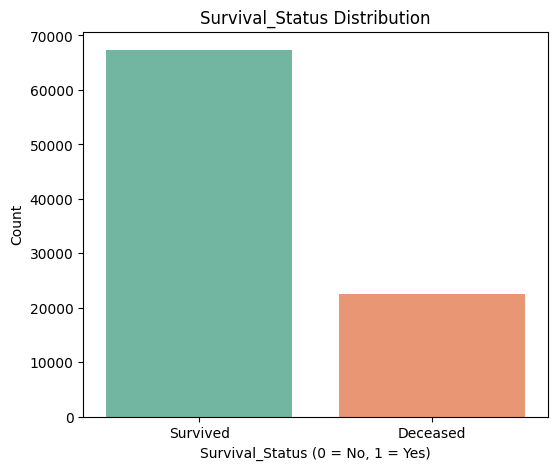

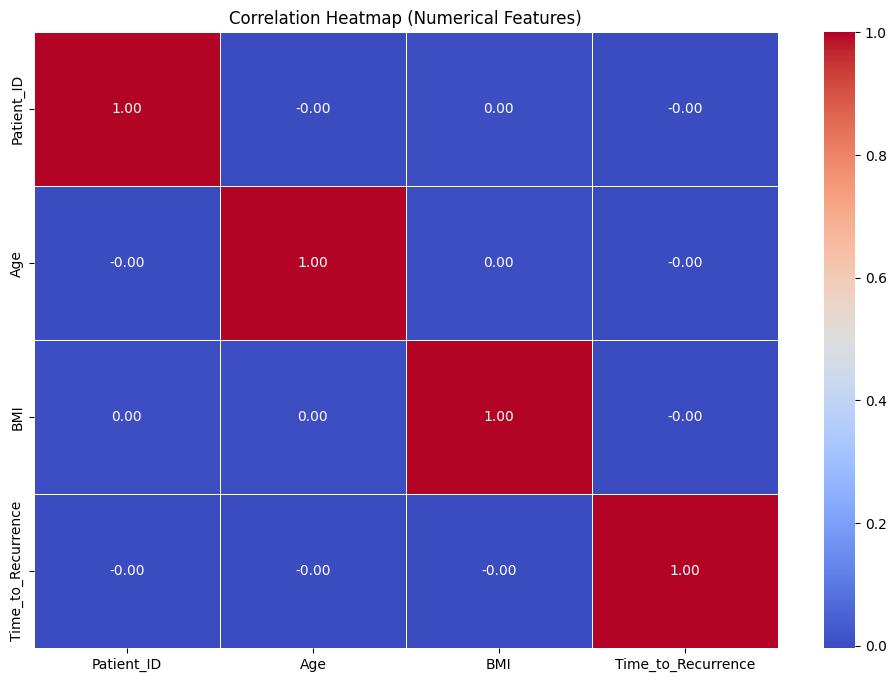

In [5]:

# Check for missing values
# 1) Missing values count per column
print("Missing values per column:\n")
print(df.isnull().sum())
print("\n" + "-"*60 + "\n")

# 2) Total missing values in the dataset
total_missing = df.isnull().sum().sum()
print("Total missing values in dataset:", total_missing)
print("\n" + "-"*60 + "\n")

# 3) Percentage of missing values
missing_percent = (df.isnull().sum() / len(df)) * 100
print("Missing value percentage per column:\n")
print(missing_percent)
print("\n" + "-"*60 + "\n")

# 4) Create a summary table
missing_summary = pd.DataFrame({
    'Missing Values': df.isnull().sum(),
    'Missing %': missing_percent
})
print("Missing Values Summary Table:\n")
print(missing_summary)


# Visualize survival status distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,5))
sns.countplot(data=df, x='Survival_Status', hue='Survival_Status', palette='Set2', legend=False)

plt.title("Survival_Status Distribution")
plt.xlabel("Survival_Status (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()



# Correlation heatmap (numerical features only)
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Generate correlation matrix
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()




## Data Preprocessing
- Handle missing values
- Encode categorical variables
- Normalize numerical features

In [13]:
# =====================================
# 1. Drop unnecessary columns (if any)
# =====================================

import pandas as pd
from sklearn.model_selection import train_test_split

# Example: drop Patient_ID only if it exists
if 'Patient_ID' in df.columns:
    df = df.drop(columns=['Patient_ID'])


# =====================================
# 2. Encode categorical variables
# =====================================

# Separate target column (correct name)
target_column = 'Survival_Status'

# Features before encoding
X = df.drop(columns=[target_column])
y = df[target_column]

# Find categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)


# =====================================
# 3. Define features and target variable
# =====================================

# Final feature matrix and target
X_final = X_encoded
y_final = y


# =====================================
# 4. Adjust target column name (already handled)
# =====================================

print("Target column used:", target_column)


# =====================================
# 5. Split into train and test sets
# =====================================

X_train, X_test, y_train, y_test = train_test_split(
    X_final,
    y_final,
    test_size=0.2,
    random_state=42,
    stratify=y_final if y_final.nunique() == 2 else None
)

# Output shapes
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
print("Target distribution:\n", y_train.value_counts())


Target column used: Survival_Status
Train shape: (71956, 45)
Test shape: (17989, 45)
Target distribution:
 Survival_Status
Survived    53873
Deceased    18083
Name: count, dtype: int64


## Model Training
Train a **Logistic Regression** model to predict patient survival.

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1️⃣ Train Logistic Regression model
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

# 2️⃣ Make predictions
y_pred = model.predict(X_test)

# 3️⃣ Model evaluation
accuracy = accuracy_score(y_test, y_pred)

# 4️⃣ Print accuracy
print("Accuracy:", accuracy)

# 5️⃣ Classification report (no warning)
print(
    "Classification Report:\n",
    classification_report(y_test, y_pred, zero_division=0)
)

# Optional: Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7486797487353383
Classification Report:
               precision    recall  f1-score   support

    Deceased       0.00      0.00      0.00      4521
    Survived       0.75      1.00      0.86     13468

    accuracy                           0.75     17989
   macro avg       0.37      0.50      0.43     17989
weighted avg       0.56      0.75      0.64     17989

Confusion Matrix:
 [[    0  4521]
 [    0 13468]]
